In [2]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 3.8 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [4]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geopy]


In [6]:
!pip install progressbar2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [progressbar2]


In [8]:
!pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 3.4 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 3.4 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [10]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [11]:
import pandas as pd # for data manipulation

from geopy.geocoders import Nominatim # for getting city coordinates
from progressbar import ProgressBar # for displaying progress 
import time # for adding time delays

from sklearn.cluster import KMeans # for k-means clustering

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization

In [14]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df = df.fillna(df.select_dtypes(include='number').mean())

# Add spaces between multiple words in location names
df['Location2']=df['Location'].str.replace( r"([A-Z])", r" 1").str.strip()
# Update Location for Pearce RAAF so it can be found by geolocator
df['Location2']=df['Location2'].apply(lambda x: 'Pearce, Bullsbrook' if x=='Pearce R A A F' else x)

# Create a flag for RainToday and RainTomorrow, note RainTomorrowFlag can be used as target variable for classification 
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# Show a snaphsot of data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location2,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,Albury,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,Albury,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,Albury,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,Albury,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,Albury,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,Uluru,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,Uluru,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,Uluru,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,Uluru,0,0


In [16]:
# Create a list of unique locations (cities)
loc_list = list(df['Location2'].unique())

from geopy.geocoders import Nominatim
from progressbar import ProgressBar
import pandas as pd
import time

geolocator = Nominatim(user_agent="weather-locator")
country = "Australia"
loc_res = []

pbar = ProgressBar()
for city in pbar(loc_list):
    try:
        loc = geolocator.geocode(city + ',' + country)
        if loc is not None:
            res = [city, loc.latitude, loc.longitude]
            loc_res.append(res)
        else:
            print(f"❌ Location not found: {city}")
    except Exception as e:
        print(f"⚠️ Error for {city}: {e}")
    time.sleep(1)  # Respect API rate limits

# Add locations to a dataframe
df_loc = pd.DataFrame(loc_res, columns=['Loc', 'Latitude', 'Longitude'])

# Show data
df_loc.head()


  0% (0 of 49) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (1 of 49) |                         | Elapsed Time: 0:00:02 ETA:   0:01:36


❌ Location not found: BadgerysCreek


  4% (2 of 49) |#                        | Elapsed Time: 0:00:03 ETA:   0:01:15
  6% (3 of 49) |#                        | Elapsed Time: 0:00:04 ETA:   0:01:09


❌ Location not found: CoffsHarbour


  8% (4 of 49) |##                       | Elapsed Time: 0:00:05 ETA:   0:01:04
 10% (5 of 49) |##                       | Elapsed Time: 0:00:07 ETA:   0:01:01
 12% (6 of 49) |###                      | Elapsed Time: 0:00:08 ETA:   0:01:00


❌ Location not found: NorahHead


 14% (7 of 49) |###                      | Elapsed Time: 0:00:09 ETA:   0:00:58


❌ Location not found: NorfolkIsland


 16% (8 of 49) |####                     | Elapsed Time: 0:00:10 ETA:   0:00:55
 18% (9 of 49) |####                     | Elapsed Time: 0:00:12 ETA:   0:00:54
 20% (10 of 49) |####                    | Elapsed Time: 0:00:13 ETA:   0:00:54
 22% (11 of 49) |#####                   | Elapsed Time: 0:00:15 ETA:   0:00:53


❌ Location not found: SydneyAirport


 24% (12 of 49) |#####                   | Elapsed Time: 0:00:16 ETA:   0:00:51


❌ Location not found: WaggaWagga


 26% (13 of 49) |######                  | Elapsed Time: 0:00:17 ETA:   0:00:49
 28% (14 of 49) |######                  | Elapsed Time: 0:00:19 ETA:   0:00:47
 30% (15 of 49) |#######                 | Elapsed Time: 0:00:20 ETA:   0:00:46
 32% (16 of 49) |#######                 | Elapsed Time: 0:00:22 ETA:   0:00:45
 34% (17 of 49) |########                | Elapsed Time: 0:00:23 ETA:   0:00:43


❌ Location not found: MountGinini


 36% (18 of 49) |########                | Elapsed Time: 0:00:24 ETA:   0:00:42
 38% (19 of 49) |#########               | Elapsed Time: 0:00:25 ETA:   0:00:41
 40% (20 of 49) |#########               | Elapsed Time: 0:00:27 ETA:   0:00:39
 42% (21 of 49) |##########              | Elapsed Time: 0:00:28 ETA:   0:00:38


❌ Location not found: MelbourneAirport


 44% (22 of 49) |##########              | Elapsed Time: 0:00:30 ETA:   0:00:36
 46% (23 of 49) |###########             | Elapsed Time: 0:00:32 ETA:   0:00:37
 48% (24 of 49) |###########             | Elapsed Time: 0:00:34 ETA:   0:00:35
 51% (25 of 49) |############            | Elapsed Time: 0:00:35 ETA:   0:00:34
 53% (26 of 49) |############            | Elapsed Time: 0:00:37 ETA:   0:00:32
 55% (27 of 49) |#############           | Elapsed Time: 0:00:38 ETA:   0:00:31
 57% (28 of 49) |#############           | Elapsed Time: 0:00:39 ETA:   0:00:29
 59% (29 of 49) |##############          | Elapsed Time: 0:00:41 ETA:   0:00:28
 61% (30 of 49) |##############          | Elapsed Time: 0:00:42 ETA:   0:00:27
 63% (31 of 49) |###############         | Elapsed Time: 0:00:44 ETA:   0:00:25
 65% (32 of 49) |###############         | Elapsed Time: 0:00:45 ETA:   0:00:24
 67% (33 of 49) |################        | Elapsed Time: 0:00:47 ETA:   0:00:22


❌ Location not found: MountGambier


 69% (34 of 49) |################        | Elapsed Time: 0:00:48 ETA:   0:00:21
 71% (35 of 49) |#################       | Elapsed Time: 0:00:49 ETA:   0:00:19
 73% (36 of 49) |#################       | Elapsed Time: 0:00:50 ETA:   0:00:18
 75% (37 of 49) |##################      | Elapsed Time: 0:00:52 ETA:   0:00:17
 77% (38 of 49) |##################      | Elapsed Time: 0:00:54 ETA:   0:00:15


❌ Location not found: PearceRAAF


 79% (39 of 49) |###################     | Elapsed Time: 0:00:55 ETA:   0:00:14


❌ Location not found: PerthAirport


 81% (40 of 49) |###################     | Elapsed Time: 0:00:56 ETA:   0:00:12
 83% (41 of 49) |####################    | Elapsed Time: 0:00:57 ETA:   0:00:11


❌ Location not found: SalmonGums


 85% (42 of 49) |####################    | Elapsed Time: 0:00:59 ETA:   0:00:09
 87% (43 of 49) |#####################   | Elapsed Time: 0:01:00 ETA:   0:00:08
 89% (44 of 49) |#####################   | Elapsed Time: 0:01:01 ETA:   0:00:07
 91% (45 of 49) |######################  | Elapsed Time: 0:01:03 ETA:   0:00:05


❌ Location not found: AliceSprings


 93% (46 of 49) |######################  | Elapsed Time: 0:01:04 ETA:   0:00:04
 95% (47 of 49) |####################### | Elapsed Time: 0:01:05 ETA:   0:00:02
 97% (48 of 49) |####################### | Elapsed Time: 0:01:07 ETA:   0:00:01
100% (49 of 49) |########################| Elapsed Time: 0:01:08 Time:  0:01:08


,Loc,Latitude,Longitude
0,Albury,-36.073773,146.913526
1,Cobar,-31.966663,145.304505
2,Moree,-29.461720,149.840715
3,Newcastle,-32.919295,151.779535
4,Penrith,-33.751195,150.694171


In [17]:
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc['Loc'], 
        mode = 'markers',
        marker_color = 'black',
        ))

fig.update_layout(
        title = 'Mapping Australian cities',
        width=1000,
        height=600,
        margin={"r":10,"t":30,"l":0,"b":0},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-23.69839, lon=133.8813), # focus point
            projection_scale=5 # zoom in on
        ),
    )
fig.show()


# K-Means clustering

/tmp/ipykernel_10048/1354762145.py:11: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



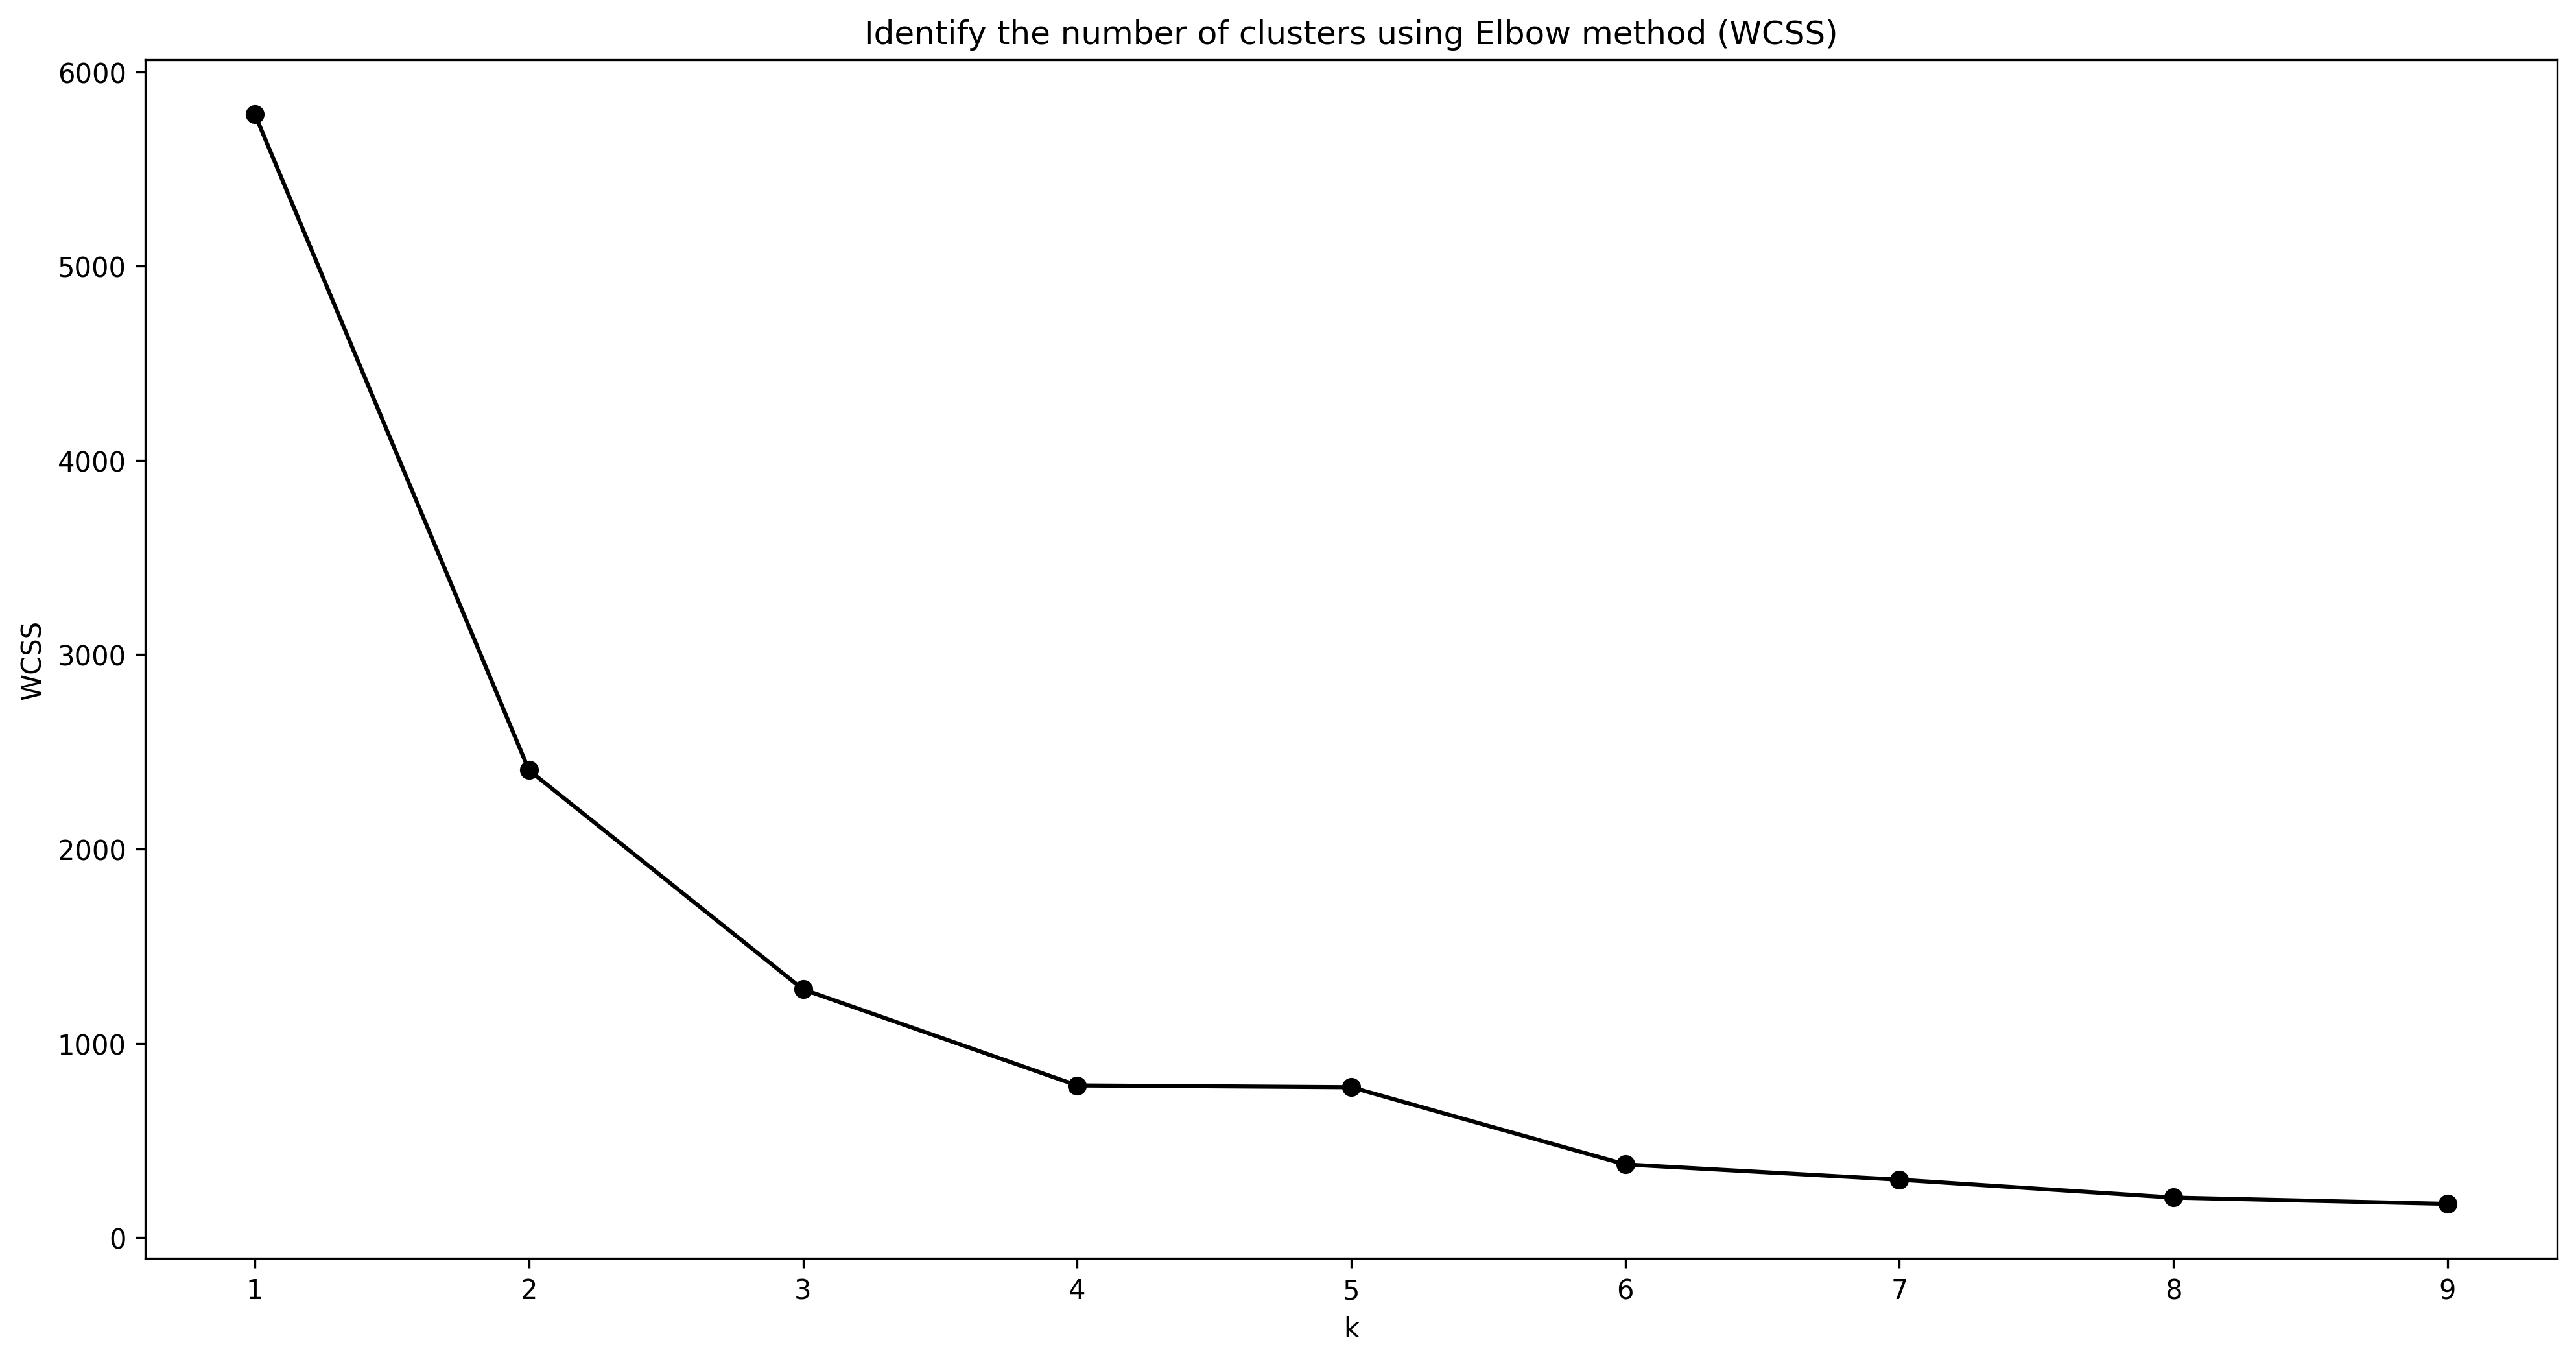

In [18]:
# Identify the number of clusters using Elbow method (WCSS)
WCSS = []
K=range(1,10)
for k in K:
    kmod = KMeans(n_clusters=k)
    kmod.fit(df_loc[['Latitude', 'Longitude']])
    WCSS.append(kmod.inertia_)

# Plot elbow graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, WCSS, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [19]:
# Select data for clustering model
X = df_loc[['Latitude', 'Longitude']]

# Set the model and its parameters - 3 clusters
model3 = KMeans(n_clusters=3,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Set the model and its parameters - 4 clusters
model4 = KMeans(n_clusters=4,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Fit the model (3 and 4 clusters)
clust3 = model3.fit(X)
clust4 = model4.fit(X)

# Print model summary
print('*************** 3 Cluster Model ***************')
print('Cluster centers: ', clust3.cluster_centers_)
print('Inertia (WCSS): ', clust3.inertia_)
print('No. of iterations: ', clust3.n_iter_)
print()

print('*************** 4 Cluster Model ***************')
print('Cluster centers: ', clust4.cluster_centers_)
print('Inertia (WCSS): ', clust4.inertia_)
print('No. of iterations: ', clust4.n_iter_)

*************** 3 Cluster Model ***************
Cluster centers:  [[-17.689643   137.34754936]
 [-35.11466596 146.24304573]
 [-33.99617333 116.39391738]]
Inertia (WCSS):  1277.925435710356
No. of iterations:  4

*************** 4 Cluster Model ***************
Cluster centers:  [[-33.99617333 116.39391738]
 [-36.74038246 143.39147528]
 [-32.35094789 151.09071551]
 [-17.689643   137.34754936]]
Inertia (WCSS):  783.3800975597024
No. of iterations:  3


In [20]:
# Attach cluster labels to the original dataset
df_loc['Clust3']=clust3.labels_
df_loc['Clust4']=clust4.labels_

# Plot cluster on the map
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc[['Loc', 'Clust3']], 
        mode = 'markers',
        marker=dict(colorscale=['blue', 'red', '#34eb34']),
        marker_color = df_loc['Clust3'],
        ))

# Add traces
fig.add_trace(go.Scattergeo(lat=model3.cluster_centers_[:,0], lon=model3.cluster_centers_[:,1], 
                            mode='markers', marker_symbol='x', marker_size=12, 
                            marker_color=['red', 'blue', '#34eb34'],
                            marker_line_color='black',
                            marker_line_width=1
                           ))

fig.update_layout(
        title = 'Mapping Australian cities',
        title_font_color='black',
        showlegend=False,
        width=1000,
        height=600,
        margin={"r":10,"t":30,"l":0,"b":0},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-23.69839, lon=133.8813), # focus point
            projection_scale=5 # zoom in on
        ),
    )

fig.show()